<h1>Analyse exploratoire des données</h1>

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h5>----------------------------dataset ratings-----------------------------------</h5>

In [270]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [271]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


<h5>----------------------------dataset movies-----------------------------------</h5>

In [272]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [273]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


<h5>----------------------------Analyse univariée-----------------------------------</h5>

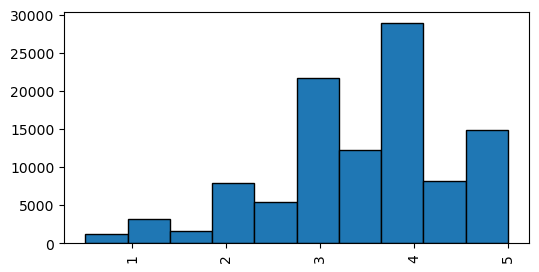

In [274]:
# Distribution des évaluations
plt.figure(figsize=(6,3))
plt.hist(df['rating'], ec='black')
plt.xticks(rotation = 'vertical')

plt.show()

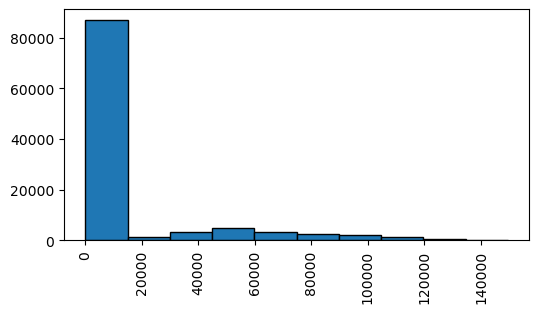

In [275]:
# Distribution des films évalués
plt.figure(figsize=(6,3))
plt.hist(df['movieId'], ec='black')
plt.xticks(rotation = 'vertical')

plt.show()

<h5>----------------------------Analyse multivariée-----------------------------------</h5>

<Axes: >

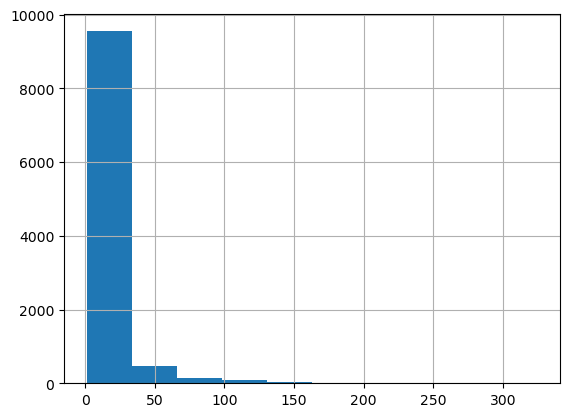

In [283]:
df.groupby('movieId')['rating'].count().hist()

In [277]:
ratings_count = df[['title','rating']].groupby('title').count().reset_index()
ratings_count.rename(columns = {'rating':'rating_count'}, inplace = True)
ratings_count.sort_values('rating_count', ascending=False)

,title,rating_count
7323,Pulp Fiction (1994),325
3349,Forrest Gump (1994),311
8136,"Shawshank Redemption, The (1994)",308
4934,Jurassic Park (1993),294
8228,"Silence of the Lambs, The (1991)",290
...,...,...
5047,Kind Lady (1935),1
5041,"Killing of Sister George, The (1968)",1
5038,Killing Season (2013),1
5031,Killer Klowns from Outer Space (1988),1


In [278]:
ratings_mean = df[['title','rating']].groupby('title').mean().reset_index()
ratings_mean.rename(columns = {'rating':'rating_mean'}, inplace = True)
ratings_mean.sort_values('rating_mean', ascending=False)

,title,rating_mean
7842,"Saddest Music in the World, The (2003)",5.0
4658,Interstate 60 (2002),5.0
3886,"Gunfighter, The (1950)",5.0
4082,Heima (2007),5.0
5397,Limelight (1952),5.0
...,...,...
1966,Cold Weather (2010),0.5
5364,Life During Wartime (2009),0.5
2286,Dark Days (2000),0.5
1083,Biker Boyz (2003),0.5


In [279]:
rating_merge=pd.merge(ratings_count, ratings_mean)
rating_merge.sort_values(['rating_count', 'rating_mean'], ascending = [False, False])

,title,rating_count,rating_mean
7323,Pulp Fiction (1994),325,4.160000
3349,Forrest Gump (1994),311,4.138264
8136,"Shawshank Redemption, The (1994)",308,4.454545
4934,Jurassic Park (1993),294,3.659864
8228,"Silence of the Lambs, The (1991)",290,4.194828
...,...,...,...
9873,"Way of War, The (2009)",1,0.500000
9883,We Are What We Are (Somos lo que hay) (2010),1,0.500000
10026,Who's Your Caddy? (2007),1,0.500000
10165,"Woods, The (2006)",1,0.500000


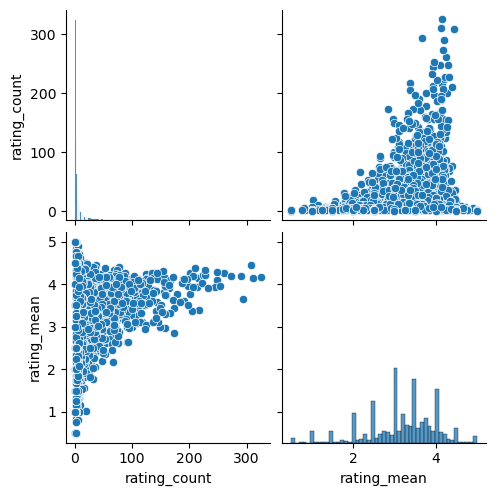

In [280]:
sns.pairplot(rating_merge)

In [281]:
# COMMENTAIRES :
# Le nombre de vote augmente fortement aux alentours de la note de 4
# Les utilisateurs semblent davantage donner leur avis quand ils apprécient un film